# Project 1
# Numerical Methods for the Linear-Advection Equation

Solve the one-dimensional wave equation

$$
\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0 
,\quad a = \frac{1}{2}
$$

with

$$
u(x, 0) = \frac{1}{2}(1 + \tanh[250(x - 20)]), \quad 0 \le x \le 40
$$

Choose initially 41 grid point mesh with $\Delta x = 1$ and compute to $t = 10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import linear_advection as LA
%matplotlib inline

In [2]:
execfile('../../matplotlibrc.py')

## Question 1

Let's overplot the solution for all schemes with the following conditions:
$$
\Delta x = 1.0\\
\Delta t = 1.0\\
CFL = a\frac{\Delta t}{\Delta x} = 0.5
$$

In [ ]:
LA.q1(dt=1.0, dx=1.0, xlim=(15, 30))
plt.show()

In [ ]:
LA.q1(dt=0.5, dx=1.0, xlim=(15, 30))
plt.show()

---

## Question 2

In [ ]:
LA.calcs_q2()

In [ ]:
LA.q2_1()

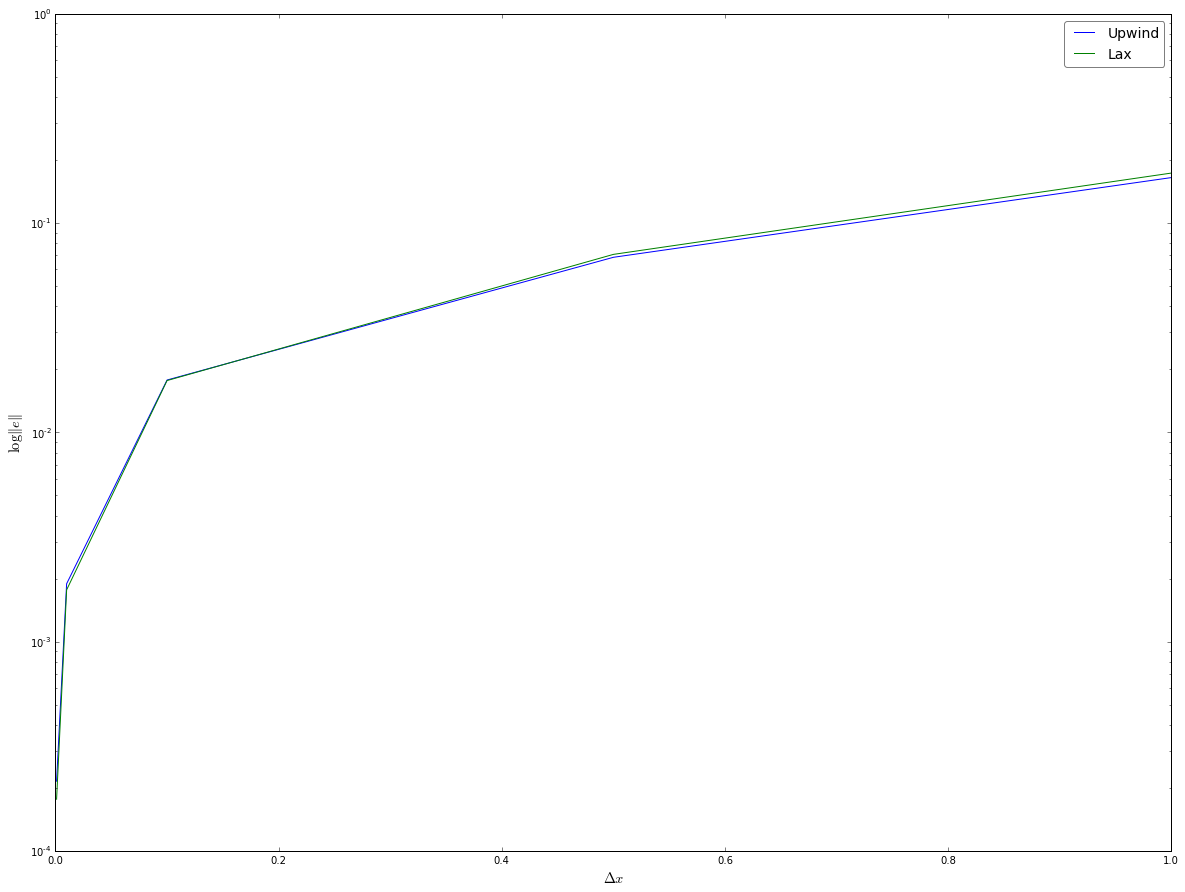

In [3]:
LA.q2_2()

In [ ]:
def signal(x):
    w = 4
    xrange = np.logical_and(x >= 0, x <= w*2*np.pi)
    u = np.zeros_like(x)
    u[xrange] = np.sin(x[xrange]/w)
    return u

def u_exact(x, t):
    return signal(x - 0.5*t)

In [ ]:
u

In [ ]:
x = np.linspace(0, 40)
u = u_exact(x, 10)
plt.plot(x, u)

In [ ]:
plt.semi